In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import sklearn.datasets
import time
from numpy import (array, dot, arccos, clip)
from numpy.linalg import norm
from sklearn import datasets
from sklearn.datasets import (make_classification, make_blobs, make_gaussian_quantiles)
# from sklearn.datasets import make_blobs
# from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import accuracy_score
from multiprocessing import Process
from math import pi
from sklearn.model_selection import train_test_split

In [3]:
# iris = datasets.load_iris()
# idx = iris.target != 2
# data = iris.data[idx].astype(np.float32)
# target = iris.target[idx].astype(np.float32)

# X_train, X_test, y_train, y_test = train_test_split(data, target, 
#                                 test_size = 0.2)

In [107]:
np.random.seed(66)
X, y = make_classification(n_samples=5000, n_features=10, n_informative=2, n_redundant=0, 
                                            n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, 
                                            flip_y=0.01, class_sep=10, hypercube=True, shift=0.0, scale=1.0, 
                                            shuffle=True, random_state=None)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [135]:
data = X_train
target = y_train
rows, columns = data.shape

#defining a function for the projections unto the ith sets
def altProj(x, i):
    separation_vector = x + (min(0, target[i] - data[i, :] @ x))*(data[i] / (norm(data[i])**2))
    #separation_vector = x + (min(0, target[i] - beta[i] - data[i, :] @ x))*(data[i] / (norm(data[i])**2))
    return separation_vector



#The Cyclic DR Projection Algoritm
start_time = time.time()
tol = 1e-10
residual = 5
beta = np.ones(len(target))
iterate = 0
iterate_counter = []
norm_counter = []
x_start = np.ones(columns)
norm_counter.append(norm(x_start))
iterate_counter.append(0)
#for iterate in range(100):
while residual > tol:
    for row in range(rows):
        Id = x_start
        #print(x_start)
        y_1 = altProj(x_start, row)
        #print(row)
        R_y_1 = 2*y_1 - x_start
        y_2 = altProj(R_y_1, (row+1)%rows)         ##Wrapping around the rows
        #print((row+1)%rows)
        R_y_2 = 2*y_2 - R_y_1
        R1_by_R2 = 0.5*(Id + R_y_2)
        x_start = R1_by_R2
        iterate += 1
        iterate_counter.append(iterate)
        norm_counter.append(norm(x_start))
        residual = abs(norm_counter[-1] - norm_counter[-2])
        
        
print('Convergence after {} iterations'.format(iterate))
print('Duration to Convergence: {} seconds'.format(time.time() - start_time))

Convergence after 4000 iterations
Duration to Convergence: 0.6582796573638916 seconds


In [136]:
#Converting classified arrays to binary arrays

predict_array = data@x_start
def array_to_binary(array):
    count_one = 0
    count_zero = 0
    binary_array = []

    for elements in array:
        if elements >= 0:
            output = 1
            binary_array.append(output)
            count_one += 1
        else:
            output = 0
            binary_array.append(output)
            count_zero +=1
    
    return binary_array
predicted_class = array_to_binary(predict_array)


In [137]:
#######TRAINING
##Performance measure of the algorithm
def projection_accuracy(target, prediction):
    right = 0
    for object in range(len(target)):
        if target[object] == prediction[object]:
            right += 1
    classification_accuracy = right / float(len(target)) * 100
    return classification_accuracy

classification_accuracy = projection_accuracy(target, predicted_class)
print("The Percentage Accuracy is {}%".format(classification_accuracy))

The Percentage Accuracy is 98.35000000000001%


In [138]:
#######TEST
##Performance measure of the algorithm

predict_array_test = X_test@x_start

predicted_class_test = array_to_binary(predict_array_test)

def projection_accuracy(y_test, predicted_class_test):
    right = 0
    for object in range(len(y_test)):
        if y_test[object] == predicted_class_test[object]:
            right += 1
    classification_accuracy = right / float(len(y_test)) * 100
    return classification_accuracy
classification_accuracy = projection_accuracy(y_test, predicted_class_test)
print("The Percentage Test Accuracy is: {:.4f}%".format(classification_accuracy))

The Percentage Test Accuracy is: 99.2000%


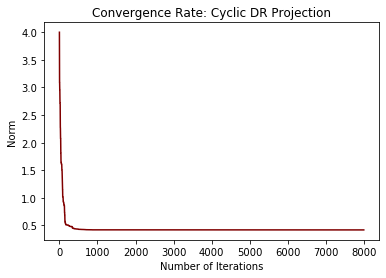

In [5]:
plt.figure()
plt.title("Convergence Rate: Cyclic DR Projection")
plt.plot(iterate_counter, norm_counter, c = "maroon")
plt.xlabel("Number of Iterations")
plt.ylabel("Norm")
plt.show()

In [8]:
# calculate a confusion matrix
def confusionMatrix(target, predicted_class):
    cases = set(target)
    matrix = [list() for x in range(len(cases))]
    for i in range(len(cases)):
        matrix[i] = [0 for x in range(len(cases))]
    lookup = dict()
    for i, value in enumerate(cases):
        lookup[value] = i
    for i in range(len(target)):
        x = lookup[target[i]]
        y = lookup[predicted_class[i]]
        matrix[y][x] += 1
    return cases, matrix


def print_confusionMatrix(target, predicted_class):
    print("T" + " ".join(str(x) for x in cases))
    print("P***")
    for i, x in enumerate(cases):
        print("%s| %s" % (x, ' '.join(str(x) for x in matrix[i])))
    

 
cases, matrix = confusionMatrix(target, predicted_class)
print_confusionMatrix(cases, matrix)

T0 1
P***
0| 3125 731
1| 874 3270


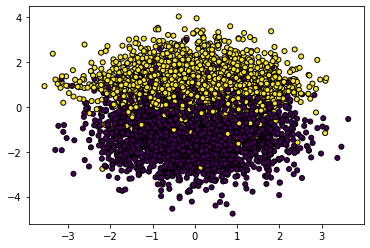

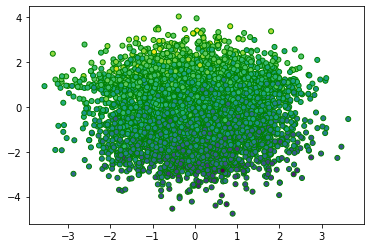

In [9]:
##See this to plot the scatter diagram well--->>> www.python-course.eu/neural_networks_with_python_numpy.php
plt.scatter(data[:, 0], data[:, 1], marker='o', c=target,
            s=25, edgecolor='k')
plt.show()

plt.scatter(data[:, 0], data[:, 1], marker='o', c=predict_array,
            s=25, edgecolor='green')
plt.show()

In [ ]:
target_hist = [num_zeros, num_ones]
predict_hist = [num_zeros_classify, num_ones_classify]
category = np.arange(2)
#category = [0, 1]
tick_label = ['Zeros','Ones']
 
#X = np.arange(4)
plt.bar(category, target_hist, color = 'b', width = 0.4, label = "Target")
plt.bar(category + 0.2, predict_hist, color = 'g', width = 0.4, label = "Predict")
plt.legend()

# naming the x-axis 
plt.xlabel('Classes') 
# naming the y-axis 
plt.ylabel('Counts') 
# plot title 
plt.title('Bar Charts of the Target and Predict Data')


plt.show()


In [ ]:
#Compare with traditional separatorabs

#KNN

#Random Forest

In [12]:
np.logical_and(predict_array>=0, predict_array2>=0)

array([False, False, False, False,  True])

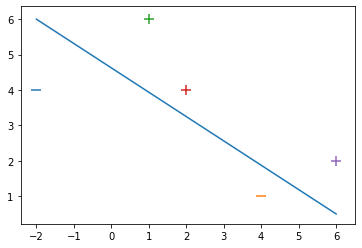

In [1]:
#Plot the separator

import numpy as np
from matplotlib import pyplot as plt
#2D data with bias
X = np.array([
    [-2, 4,-1],
[4, 1, -1],
[1,6,-1],
[2,4,-1],
[6,2,-1],
])

y = np.array([-1,-1,1,1,1])
errors = []
# Visualizing the data
for d, sample in enumerate(X):
    #Plot negative sample
    if d<2:
        plt.scatter(sample[0], sample[1], s = 120, marker='_', linewidths=2)
        
    #Plot positive sample:
    else:
        plt.scatter(sample[0], sample[1], s =120, marker = '+', linewidths = 2)
        
        
plt.plot([-2,6], [6,0.5])

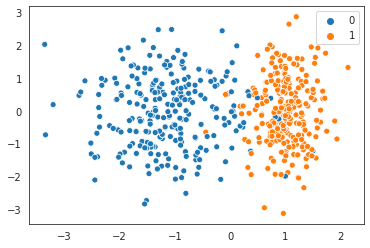

In [4]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

In [ ]:
arrays = [array1, array2, array3, array4]

def function1(arrays):
    count_one = 0
    count_zero = 0
    find_class = []
   
    for array in arrays:
        for points in array:
            if points == 1:
                it = 1
                find_class.append(it)
                count_one += 1
            else:
                it = 0
                find_class.append(it)
                count_zero +=1
    
    return find_class[array]

function1(arrays)

